<a href="https://colab.research.google.com/github/RaviSoni804426/Kaggle-Work-Profile/blob/main/StockPriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance pandas scikit-learn matplotlib seaborn


In [2]:
import yfinance as yf
import pandas as pd

# Choose your stock
ticker = 'AAPL'

# Download historical data
data = yf.download(ticker, start="2024-08-01", end="2024-11-30")

# Show head
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2024-08-01  217.343536  223.435043  216.009778  223.325554   62501000
2024-08-02  218.836563  224.549849  216.696577  218.129861  105568600
2024-08-05  208.295868  212.506173  195.087635  198.163247  119548600
2024-08-06  206.265350  209.012512  200.134036  204.344342   69660500
2024-08-07  208.843323  212.645533  205.429281  205.936902   63516400


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-08-01,217.343536,223.435043,216.009778,223.325554,62501000
2024-08-02,218.836563,224.549849,216.696577,218.129861,105568600
2024-08-05,208.295868,212.506173,195.087635,198.163247,119548600
2024-08-06,206.265350,209.012512,200.134036,204.344342,69660500
2024-08-07,208.843323,212.645533,205.429281,205.936902,63516400


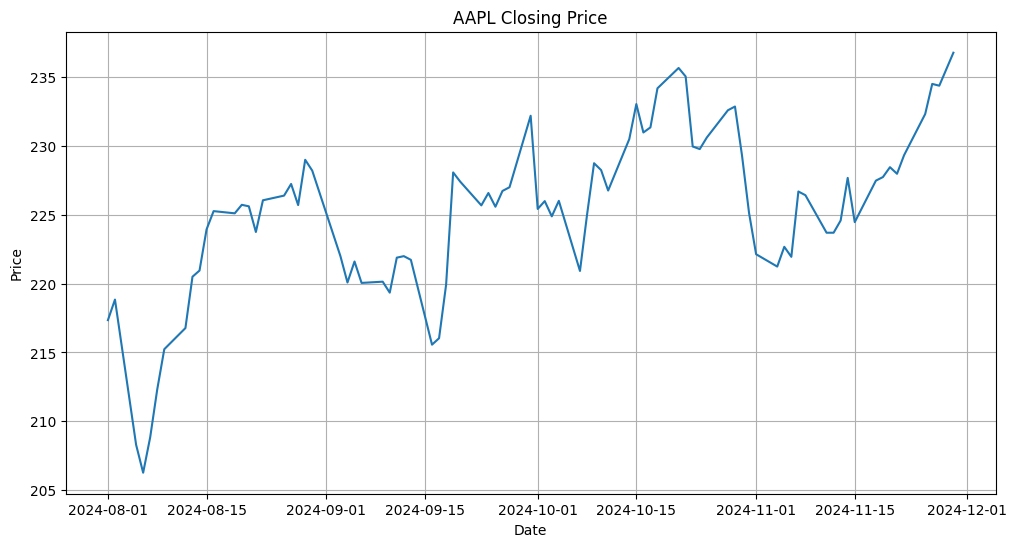

In [4]:
# Handle missing values
data = data.dropna()

# Reset index to make 'Date' a column
data.reset_index(inplace=True)

# Use only 'Close' price for prediction
close_data = data[['Date', 'Close']]

# Plot data
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(close_data['Date'], close_data['Close'])
plt.title(f'{ticker} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.show()


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Scale prices between 0 and 1
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(close_data['Close'].values.reshape(-1, 1))

# Create sequences
X, y = [], []
n_past = 15  # use last 15 days to predict next

for i in range(n_past, len(scaled_close)):
    X.append(scaled_close[i - n_past:i, 0])
    y.append(scaled_close[i, 0])

X, y = np.array(X), np.array(y)


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_flat = X.reshape(X.shape[0], -1)  # Flatten for sklearn
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Get last 15 days of November for prediction
last_days = scaled_close[-n_past:]

predicted_scaled = []

current_input = last_days.copy()

for _ in range(15):
    input_reshaped = current_input.reshape(1, -1)
    pred = model.predict(input_reshaped)[0]
    predicted_scaled.append(pred)
    current_input = np.append(current_input[1:], pred)

# Inverse transform to get actual prices
predicted_prices = scaler.inverse_transform(np.array(predicted_scaled).reshape(-1, 1))


In [8]:
future_data = yf.download(ticker, start="2024-12-01", end="2024-12-16")
actual_prices = future_data['Close'].values[:15]
dates = future_data.index[:15]


[*********************100%***********************]  1 of 1 completed


In [10]:
# Fetch actual prices
import yfinance as yf
import numpy as np

ticker = 'AAPL'
future_data = yf.download(ticker, start="2024-12-01", end="2024-12-16")

# Fix: Get exactly 15 values
actual_prices = future_data['Close'].values[:15]
dates = future_data.index[:15]

# Make sure predicted_prices has 15 values
predicted_prices = np.array(predicted_prices).reshape(-1)[:15]


[*********************100%***********************]  1 of 1 completed


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Ensure both arrays have the same length
min_len = min(len(actual_prices), len(predicted_prices))

# Slice to equal length
actual_prices = actual_prices[:min_len]
predicted_prices = predicted_prices[:min_len]

# Calculate metrics
mae = mean_absolute_error(actual_prices, predicted_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 12.086107462146547
RMSE: 13.039066596661224


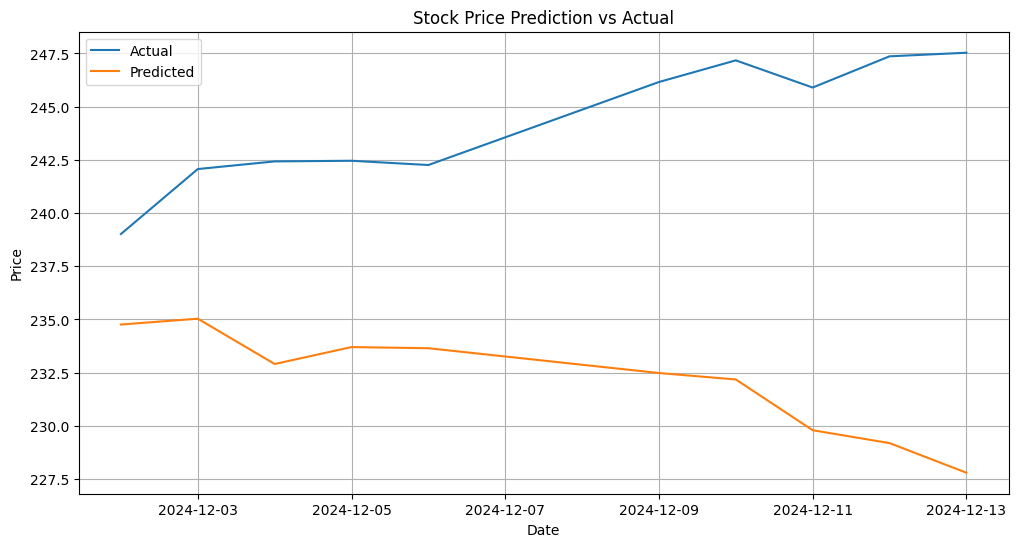

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(dates, actual_prices, label='Actual')
plt.plot(dates, predicted_prices, label='Predicted')
plt.title('Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()
